# Programa de Pós-Graduação em Computação Aplicada (UnB)
## Disciplina: ANÁLISE ESTATÍSTICA DE DADOS E INFORMAÇÕES - Turma 01 - 2023/1
## Professor: João Gabriel de Moraes Souza
## Aluno: Francisco Gonçalves de Araújo Filho
## Matrícula: 231109675
### Tarefa 2
Você é um analista financeiro de uma grande corretora de investimentos. Essa corretora
pede que você adquira os dados de 5 ações da bolsa de valores de São Paulo _- B3 -_
e o índice que a compõe. As cinco ações escolhidas ficará a seu critério. Com isso a
corretora pede:

### **Questão a)** 
Escolha cinco ações para análise: você deve selecionar cinco ações de sua preferência
 e obter dados históricos de preços dessas ações, além do índice que as compõe.

In [1]:
# Importanto bibliotecas necessárias
import pandas as pd
import yfinance as yf
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize
import locale
from scipy.stats import norm

Montou-se uma carteira de ações ligadas ao agronegócio.

In [2]:
# Selecionando as 5 ações (Agronegócio) e o índice IBOVESPA
# Baixando os dados de fechamento
acoes = ['JBSS3.SA', 'SUZB3.SA', 'SLCE3.SA', 'CSAN3.SA', 'BEEF3.SA', '^BVSP']
acoes_df = pd.DataFrame()
for acao in acoes:
    acoes_df[acao] = yf.download(acao,
            start='2012-01-01', end='2023-05-09')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
acoes_df.index = acoes_df.index.strftime('%Y-%m-%d')
acoes_df.reset_index(inplace=True)
acoes_df

Date   JBSS3.SA   SUZB3.SA   SLCE3.SA   CSAN3.SA  BEEF3.SA   
0     2012-01-02   5.620000  20.010000   6.524793   5.932352  5.113132  \
1     2012-01-03   5.790000  20.010000   6.487603   6.016783  5.162297   
2     2012-01-04   5.900000  20.010000   6.483471   6.045667  5.113132   
3     2012-01-05   6.000000  20.010000   6.384297   6.094547  4.975471   
4     2012-01-06   6.070000  20.010000   6.404958   6.021226  4.955805   
...          ...        ...        ...        ...        ...       ...   
2810  2023-05-02  17.389999  40.680000  39.290909  14.510000  8.220000   
2811  2023-05-03  17.629999  40.099998  39.863636  14.410000  8.500000   
2812  2023-05-04  17.950001  39.599998  39.281818  14.210000  8.440000   
2813  2023-05-05  18.280001  41.610001  38.518181  14.760000  8.810000   
2814  2023-05-08  17.799999  41.869999  35.900002  15.260000  9.000000   

         ^BVSP  
0          NaN  
1      59265.0  
2      59365.0  
3      58546.0  
4      58600.0  
...        ...  
2810  101927.0  
2811  101797.0  
2812  102174.0  
2813  105148.0  
2814  106042.0  

[2815 rows x 7 columns]

### **Questão b)** 
Realize uma análise gráfica descritiva temporal do preço das ações: você deve
plotar os dados de preços das ações ao longo do tempo para cada uma das ações
selecionadas e para o índice. Visualize como o preço das ações mudou ao longo
do tempo e identifique possíveis tendências.

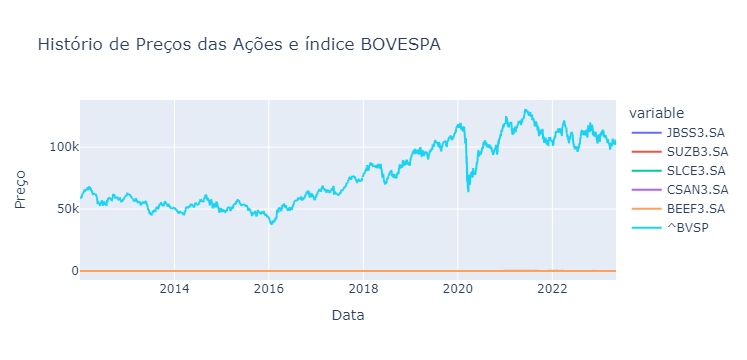

In [4]:
# Histórico de ações com o Índice BOVESPA
fig = px.line(acoes_df, x=acoes_df["Date"], y=acoes, title='Histório de Preços das Ações e índice BOVESPA')
fig.update_xaxes(title='Data')
fig.update_yaxes(title='Preço')
fig.show()

#### Análise do Gráfico do Hitórico as ações
Ao se clicar nas variáveis da legenda é possível selecionar as curvas plotadas. Devida a grande diferença de valores do índice BOVESPA em comparação ao fechamento das ações (ligadas ao agro-negócio), para melhor visualização da tendência, seria indicado retirar do gráfico a curva referente ao Índice.

Nota-se uma tendência de crescimento a partir de 2019, para a maioria das ações e uma tendência de queda no início de 2023. 

### **Questão c)** 
Realize uma análise gráfica descritiva temporal do retorno das ações: Você deve
calcular os retornos diários das ações e do índice e plotar os dados de retorno
ao longo do tempo para cada uma das ações e para o índice. Visualize como o
retorno das ações mudou ao longo do tempo e identifique possíveis padrões.

#### Taxa de Retonro
A taxa de retorno é dada pela expressão abaixo
$$E[Ri] = \log \left(\frac{P_t}{P_{t-1}}\right)$$

In [5]:
# Calcular os retornos diários de cada ação e do índice
dataset = acoes_df.copy()
dataset.drop(labels = ['Date'], axis=1, inplace=True)
taxas_retorno = np.log(dataset / dataset.shift(1))
dataset_date = acoes_df.copy()
date = dataset_date.filter(["Date"]) 
taxas_retorno = pd.concat([date, taxas_retorno], axis=1)
taxas_retorno

Date  JBSS3.SA  SUZB3.SA  SLCE3.SA  CSAN3.SA  BEEF3.SA     ^BVSP
0     2012-01-02       NaN       NaN       NaN       NaN       NaN       NaN
1     2012-01-03  0.029801  0.000000 -0.005716  0.014132  0.009569       NaN
2     2012-01-04  0.018820  0.000000 -0.000637  0.004789 -0.009569  0.001686
3     2012-01-05  0.016807  0.000000 -0.015415  0.008053 -0.027292 -0.013892
4     2012-01-06  0.011599  0.000000  0.003231 -0.012104 -0.003960  0.000922
...          ...       ...       ...       ...       ...       ...       ...
2810  2023-05-02 -0.028905  0.021870 -0.006458 -0.031878 -0.039361 -0.024279
2811  2023-05-03  0.013707 -0.014360  0.014471 -0.006916  0.033496 -0.001276
2812  2023-05-04  0.017988 -0.012547 -0.014703 -0.013976 -0.007084  0.003697
2813  2023-05-05  0.018217  0.049511 -0.019631  0.037975  0.042905  0.028692
2814  2023-05-08 -0.026609  0.006229 -0.070393  0.033314  0.021337  0.008466

[2815 rows x 7 columns]

In [6]:
taxas_retorno.describe()

JBSS3.SA     SUZB3.SA     SLCE3.SA     CSAN3.SA     BEEF3.SA   
count  2814.000000  2814.000000  2814.000000  2814.000000  2814.000000  \
mean      0.000410     0.000262     0.000606     0.000336     0.000201   
std       0.029688     0.018349     0.022708     0.022367     0.024773   
min      -0.376051    -0.175912    -0.111226    -0.203794    -0.205485   
25%      -0.015933     0.000000    -0.012009    -0.012774    -0.013293   
50%       0.000000     0.000000     0.000000     0.000202     0.000000   
75%       0.015962     0.000000     0.013162     0.012847     0.013245   
max       0.219915     0.197168     0.125769     0.133300     0.167054   

             ^BVSP  
count  2797.000000  
mean      0.000185  
std       0.015698  
min      -0.159930  
25%      -0.008229  
50%       0.000273  
75%       0.008995  
max       0.130223

In [7]:
# Avaliando a média dos fechamentos
dataset = taxas_retorno.copy()
dataset.drop(labels = ['Date'], axis=1, inplace=True)
dataset.mean()*100

JBSS3.SA    0.040969
SUZB3.SA    0.026238
SLCE3.SA    0.060594
CSAN3.SA    0.033575
BEEF3.SA    0.020093
^BVSP       0.018519
dtype: float64

#### Média da taxa de Retorno
Repara-se que todas as ações tiveram média de taxa de retorno bem próximo de zero, durante o tempo de apuração, e o mesmo aconteceu com o índice BOVESPA.

In [8]:
# Avaliando o desvio padrão
dataset.std()*100

JBSS3.SA    2.968839
SUZB3.SA    1.834948
SLCE3.SA    2.270790
CSAN3.SA    2.236725
BEEF3.SA    2.477316
^BVSP       1.569774
dtype: float64

#### Desvio Padrão
O desvio padrão da taxa de retorno das ações do agronegócio selecionadas ficou próximo entre 2 e 3%, o que representa uma volatilidade relativamente baixa, indicando que as taxas de retorno anuais foram consistentes e próximas à média anual.

Entretanto, o desvio padrão da taxa de retorno do índice BOVESPA foi 1,5%. Isso sugere que as ações são mais arriscadas do que o índice de mercado, pois seus retornos foram mais voláteis e menos previsíveis, com exceção da SUZB3, com o valor bem próximo ao do índice.

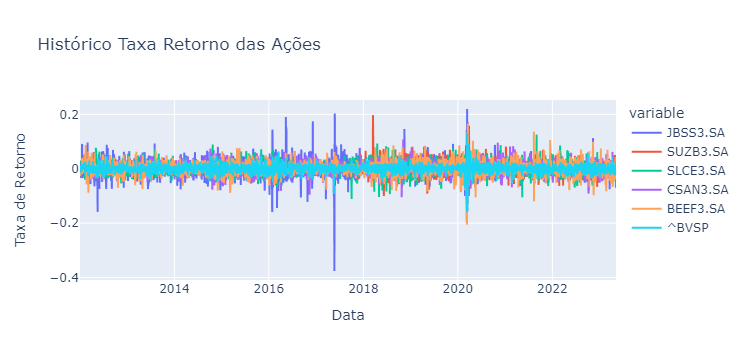

In [9]:
# Plotando os dados de retorno
figura = px.line(taxas_retorno, x=taxas_retorno["Date"], y=acoes, title='Histórico Taxa Retorno das Ações')
figura.update_xaxes(title='Data')
figura.update_yaxes(title='Taxa de Retorno')
figura

#### Análise do Histórico da taxa de Retorno das Ações
No início de 2020, percebe-se uma grande volatilidade na taxa de retorno da IBOVESPA e das ações analisadas, principalmente devido à pandemia de COVID-19 e seus efeitos econômicos. Em março de 2020, a IBOVESPA sofreu uma forte queda devido à incerteza econômica causada pela pandemia, afetando muitas empresas e setores da economia. A queda foi tão significativa que a bolsa chegou a acionar o circuit breaker.

No entanto, a IBOVESPA também teve uma recuperação rápida após a queda, impulsionada principalmente pelos estímulos econômicos dos governos e pelos baixos juros que tornaram a renda fixa menos atraente para os investidores.

Percebe-se também no gráfico uma grande volatiblidade na ação JBSS3entre 2016 e 2018.

No geral, a tendência das ações avaliadas parece acompanhar a variação da taxa de retorno do Índice BOVESPA.

#### Análise da correlação entre ações

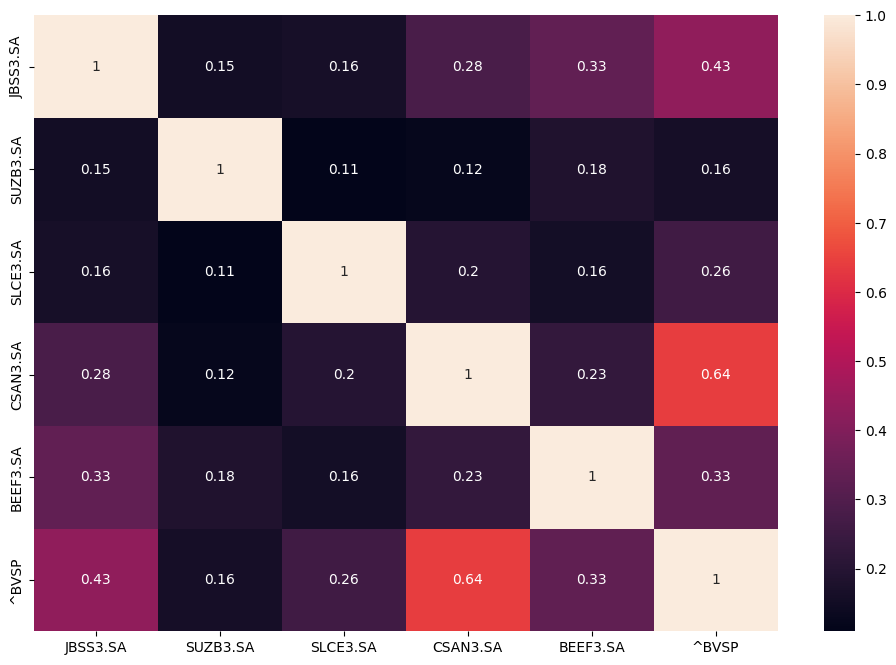

In [10]:
# Plotando mapa de calor da matirz de correlação do dataframe de retorno 
# das ações
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True);

#### Mapa de calor - correlação entre ações e índice BOVESPA
O objeto dataset acima é o conjunto de dados que contém a taxa de retorno das ações escolhidas e do índice BOVESPA
A função corr() é chamada em dataset, calculando a matriz de correlação entre as ações. 
Essa matriz mostra a relação linear entre cada par de colunas do dataset.
Por sua vez, é montado o mapa de calor da correlação entre os elementos do dataset.
É possível percebe que a ação que tem maior correlação com o índice BOVESPA é 
CSAN3, enquanto que tem menor correlação é a ação SUZB3.
Percebe-se também, pela predominância de cores mais escuras, que a correlação entre as ações é baixa,
que é uma característica desejável em uma carteira de ações porque ela pode reduzir o risco e aumentar a eficiência da carteira.

#### **Questão d)** 
Monte um conjunto de carteiras simuladas da fronteira eficiente: Você deve simular
um grande número de carteiras aleatórias que contenham as ações selecionadas
e calcular o retorno e o risco de cada carteira. Você deve usar a simulação Monte
Carlo para criar 50.000 carteiras simuladas e plotar a fronteira eficiente de Markowitz. 
Isso permitirá a você identificar a carteira com o melhor índice de Sharpe.

#### Localizando a maior taxa Sharpe
O trecho de código abaixo realiza o cálculo da taxa de retorno do conjunto de ações selecionadas, 
com base em dados históricos. 
Após o cálculo so histórico da taxa de Retorno das Ações, 
a técnica Monte Carlo é aplicada para simular 50.000 carteiras aleatórias.

Para cada carteira amostrada é gerado um conjunto de pesos aleatórios e normalizados para que a soma deles 
seja igual a 1. 
Em seguida, o retorno esperado, a volatilidade esperada e o Sharpe Ratio da carteira são calculados. 
Os valores dos retornos, volatilidade e Sharpe Ratio são salvos em arrays para serem posteriormente analisados.

O objetivo final é encontrar a carteira de ações que forneça o melhor Sharpe Ratio, 
o que indica a relação entre o retorno esperado e o risco associado à carteira, 
encontrando a melhor combinação de pesos para maximizar o Sharpe Ratio e, portanto, maximizar o 
retorno ajustado pelo risco.

In [11]:
# Calculando a Taxa de retorno das ações
acoes_port = acoes_df.copy()
acoes_port.drop(labels = ['^BVSP'], axis=1, inplace=True)
log_ret = acoes_port.copy()
log_ret.drop(labels = ["Date"], axis = 1, inplace = True)
log_ret = np.log(log_ret/log_ret.shift(1))

# Simulando 50.000 carteiras aleatórias (Monte Carlo)
np.random.seed(42)
num_ports = 50000
# Vetor de pesos
all_weights = np.zeros((num_ports, len(acoes_port.columns[1:])))
# Retornos
ret_arr = np.zeros(num_ports)
# Riscos
vol_arr = np.zeros(num_ports)
# Sharpe
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Pesos amostrados
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    # Salva pesos amostrados
    all_weights[x,:] = weights
    
    # Retorno experado
    ret_arr[x] = np.sum((log_ret.mean() * weights))
    
    # Volatibilidade esperada
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [12]:
print("Max Sharpe Ratio: {}". format(sharpe_arr.max()))
local_Max_Sharp_Ratio = sharpe_arr.argmax()
print("Local do Max Sharpe Ratio: {}". format(local_Max_Sharp_Ratio))

Max Sharpe Ratio: 0.03085028950981486
Local do Max Sharpe Ratio: 41172


#### Abaixo é apresentada a carteira com o melhor índice de Sharpe.

In [13]:
# Pesos do Portfólio do Max Sharpe Ratio
print(all_weights[local_Max_Sharp_Ratio,:])

[0.12394067 0.23548034 0.46973486 0.15631528 0.01452885]


In [14]:
# salvando os dados do Max Sharpe Ratio
max_sr_ret = ret_arr[local_Max_Sharp_Ratio]
max_sr_vol = vol_arr[local_Max_Sharp_Ratio]
print(max_sr_ret*100)
print(max_sr_vol*100)

0.04525987277095264
1.467080973634087


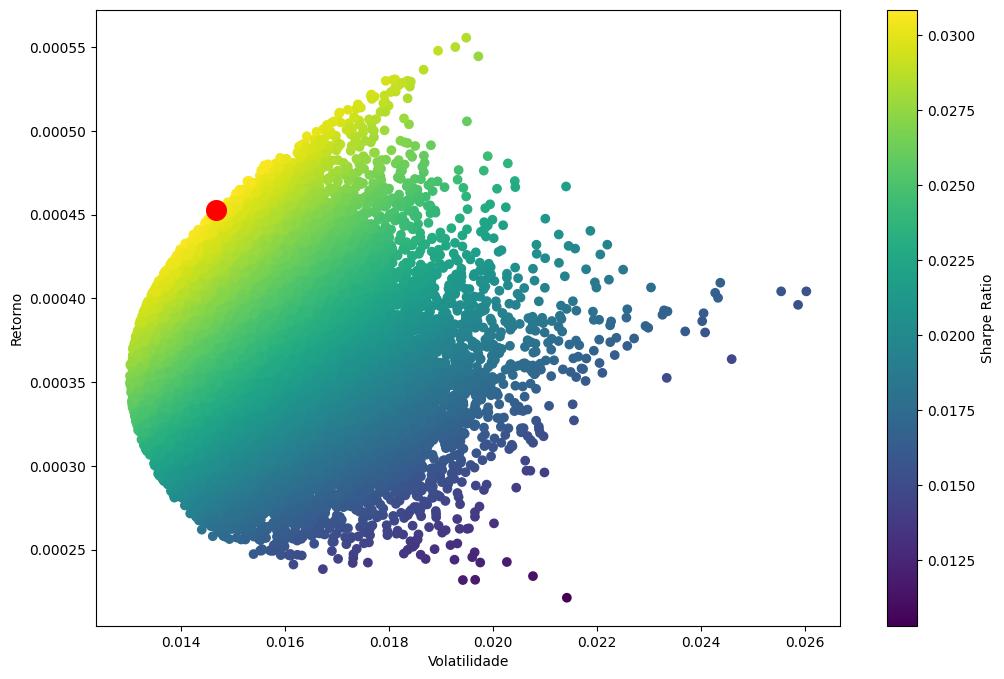

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=200) 
plt.show()

#### Gráfico de dispersão
O gráfico de dispersão apresenta a relação entre a volatilidade e o retorno calculados a partir das 50.000 carteiras amostradas. A comportamento do gráfico dado a concentração dos pontos sugere uma relação entre as variáveis.

O ponto vermelho em destaque representa o Índice de Sharpe Máximo, que é o valor mais alto da relação de Sharpe entre todas as carteiras simuladas na Fronteira Eficiente de Markowitz. Essa medida é calculada para determinar qual é a carteira ótima que oferece o melhor equilíbrio entre retorno e risco, levando em consideração a taxa livre de risco.

#### **Questão e)** 
Identique a carteira com melhor índice de Sharpe: Você deve escolher a carteira com o melhor índice de Sharpe, que é uma medida de risco-retorno. Você deve plotar a carteira selecionada no gráfico das carteiras simuladas e destacar a fronteira eficiente de Markowitz.

In [16]:
#  Retorna vetor com 
#       retorno esperado, volatilidade, relação de Sharpe da carteira 
#  correspondente aos pesos informados.
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

# retorna o valor negativo da relação de Sharpe para uma determinada
# carteira de pesos
def neg_sharpe(weights):
# 2 é o índice da taxa sharpe
    return get_ret_vol_sr(weights)[2] * -1

# Valida a cartera para soma de pesos igual a 1
def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [17]:
cons = ({'type': 'eq', 'fun': check_sum})
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1))
init_guess = ((0.2),(0.2),(0.2),(0.2),(0.2))

In [18]:
op_results = optimize.minimize(neg_sharpe, init_guess, method="SLSQP", bounds= bounds, constraints=cons)
print(op_results)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.030931425992341815
       x: [ 1.037e-01  2.553e-01  4.831e-01  1.579e-01  1.789e-18]
     nit: 9
     jac: [ 4.241e-04 -3.016e-05 -1.384e-04  1.837e-04  2.091e-03]
    nfev: 55
    njev: 9


#### Otimização dos Pesos
A otimização realizada busca encontrar a alocação ideal de pesos para cada um dos ativos na carteira, de forma a maximizar o índice de Sharpe. O objetivo é encontrar a combinação de pesos que minimize o risco (volatilidade) e maximize o retorno esperado da carteira.

O resultado indicou que a otimização foi executada com sucesso (success=True) e que o algoritmo convergiu para uma solução ótima (status=0). A função objetivo neg_sharpe foi minimizada para um valor de -0.030931425992341815, que corresponde ao valor negativo do índice de Sharpe da carteira com maior Sharpe Ratio encontrado pelo otimizador.

O vetor x representa a alocação de pesos da carteira otimizada para cada ativo, onde x[0] é o peso da primeira ação (JBSS3), x[1] é o peso da segunda ação (SUZB3), e assim por diante.

O número nit é o número de iterações realizadas pelo otimizador e jac é o gradiente da função objetivo. Os outros parâmetros (nfev e njev) indicam o número de avaliações de função e de jacobiana, respectivamente.

In [19]:
# Montando a fronteira eficiente de Markowitz 
# ao longo do eixo y (retorno esperado) 
frontier_y = np.linspace(0.00025, 0.0006, 250)

def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [20]:
# Monta a fronteira eficiente de Markowitz, 
# mostra o menor nível de volatilidade que 
# pode ser alcançado para cada possível retorno.
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = optimize.minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

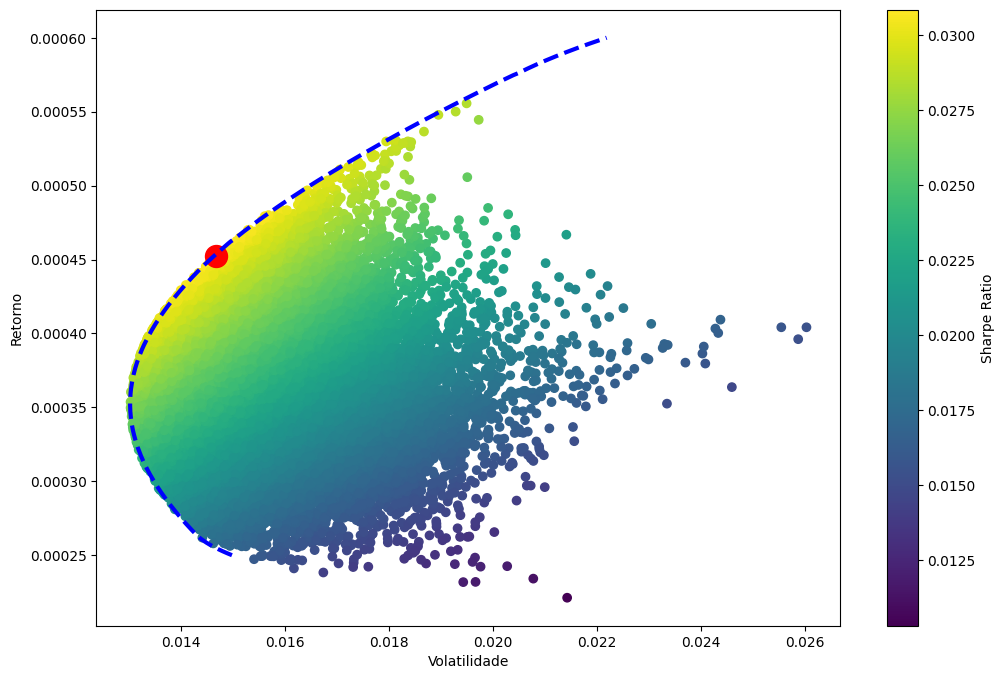

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.plot(frontier_x,frontier_y, 'b--', linewidth=3)
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=250)
plt.show()

#### Fronteira eficiente de Markowitz
O gráfico plotado mostra a relação entre o retorno e a volatilidade das ações escolhidas e do índice BOVESPA. Cada ponto no gráfico representa uma carteira de investimentos composta pelas cinco ações e a cor de cada ponto representa o índice de Sharpe da carteira correspondente.

A fronteira eficiente de Markowitz é plotada em azul tracejado e representa a combinação de carteiras que oferecem o maior retorno para um determinado nível de risco, ou a menor volatilidade para um determinado nível de retorno.

O ponto vermelho indica a carteira de investimentos que oferece o melhor índice de Sharpe, ou seja, a carteira que oferece o melhor retorno ajustado ao risco. Essa carteira é a que maximiza a inclinação da linha traçada a partir da origem e tangente à fronteira eficiente.

#### **Questão f)** 
Ilustre a evolução de seu patrimônio: Você pode simular o desempenho da carteira selecionada ao longo do tempo e calcular o retorno esperado. Você deve então plotar a evolução do patrimônio com um investimento inicial de R$35:000,00.

In [22]:
acoes_port = acoes_df.copy()
acoes_port.drop(labels = ['^BVSP'], axis=1, inplace=True)
acoes_port

Date   JBSS3.SA   SUZB3.SA   SLCE3.SA   CSAN3.SA  BEEF3.SA
0     2012-01-02   5.620000  20.010000   6.524793   5.932352  5.113132
1     2012-01-03   5.790000  20.010000   6.487603   6.016783  5.162297
2     2012-01-04   5.900000  20.010000   6.483471   6.045667  5.113132
3     2012-01-05   6.000000  20.010000   6.384297   6.094547  4.975471
4     2012-01-06   6.070000  20.010000   6.404958   6.021226  4.955805
...          ...        ...        ...        ...        ...       ...
2810  2023-05-02  17.389999  40.680000  39.290909  14.510000  8.220000
2811  2023-05-03  17.629999  40.099998  39.863636  14.410000  8.500000
2812  2023-05-04  17.950001  39.599998  39.281818  14.210000  8.440000
2813  2023-05-05  18.280001  41.610001  38.518181  14.760000  8.810000
2814  2023-05-08  17.799999  41.869999  35.900002  15.260000  9.000000

[2815 rows x 6 columns]

#### Simulando o Desempenho da Carteira
A função a seguir simula a alocação de ativos para a construção do portfólio. Ela recebe como parâmetros o conjunto de dados (dataset) contendo o histórico de preços das ações escolhidas, o investimento inicial (dinheiro_total), uma semente para geração de números aleatórios (seed) e os melhores pesos encontrados anteriormente (melhores_pesos).

Inicialmente, é verificado se os pesos das ações do portfólio são passados, caso contrário, pesos aleatórios são gerados e normalizados para que a soma dos pesos seja igual a 1.

A partir daí o valor das ações no conjunto de dados é ajustado para o valor que seria obtido caso o investimento tivesse sido realizado no início do período analisado. Em seguida, é calculado o valor atual de cada ação no portfólio, multiplicando-se o valor atual da ação pelo seu respectivo peso e pelo dinheiro total investido. Em seguida, é calculada a soma dos valores das ações de todo o portfólio e armazenada em uma nova coluna chamada "soma valor".

Adiciona-se uma nova coluna chamada "taxa retorno", que armazena a taxa de retorno diária do portfólio. Essa 

Por fim, a função retorna o conjunto de dados modificado, as datas correspondentes, um dataframe contendo as ações e seus respectivos pesos, e o valor atual do portfólio.

In [23]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
  dataset = dataset.copy()

  if seed != 0:
    np.random.seed(seed)

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:  
    pesos = np.random.random(len(dataset.columns) - 1)
    pesos = pesos / pesos.sum()
    
  colunas = dataset.columns[1:]
  for i in colunas:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
  
  
  datas = dataset['Date']
  dataset.drop(labels = ['Date'], axis = 1, inplace = True)
  dataset['soma valor'] = dataset.sum(axis = 1)

  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1]) * 100

  acoes_pesos = pd.DataFrame(data = {'Ações': colunas, 'Pesos': pesos})

  return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [24]:
# Estipula valor inicial de Investimento
investimento_inicial = 35000
semente = 0
# O vetor de pesos por ações é o Max Sharpe Ratio
# calculado anteriormente 
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(acoes_port, investimento_inicial, semente, 
                                                          all_weights[local_Max_Sharp_Ratio,:])
dataset

JBSS3.SA      SUZB3.SA       SLCE3.SA      CSAN3.SA    BEEF3.SA   
0      4337.923387   8241.812018   16440.720017   5471.034773  508.509805  \
1      4469.141772   8241.812018   16347.011340   5548.900326  513.399327   
2      4554.047850   8241.812018   16336.599132   5575.538160  508.509805   
3      4631.235027   8241.812018   16086.707326   5620.616759  494.819183   
4      4685.266235   8241.812018   16138.767168   5552.997541  492.863346   
...            ...           ...            ...           ...         ...   
2810  13422.862382  16755.467846   99002.499595  13381.659572  817.493218   
2811  13608.111606  16516.573992  100445.617773  13289.435517  845.339675   
2812  13855.112044  16310.631665   98979.594178  13104.988286  839.372530   
2813  14109.829912  17138.520700   97055.433404  13612.218830  876.169752   
2814  13739.329991  17245.610018   90458.327228  14073.337347  895.065538   

         soma valor  taxa retorno  
0      35000.000000      0.000000  
1      35120.264783      0.343025  
2      35216.506965      0.273661  
3      35075.190313     -0.402087  
4      35111.706308      0.104054  
...             ...           ...  
2810  143379.982613     -0.791148  
2811  144705.078563      0.919940  
2812  143089.698703     -1.122603  
2813  142792.172598     -0.208146  
2814  136411.670123     -4.571293  

[2815 rows x 7 columns]

In [25]:
# Exibe o valor de pesos utilizados 
acoes_pesos

Ações     Pesos
0  JBSS3.SA  0.123941
1  SUZB3.SA  0.235480
2  SLCE3.SA  0.469735
3  CSAN3.SA  0.156315
4  BEEF3.SA  0.014529

In [26]:
# Exibe valor total final
soma_valor

136411.67012274702

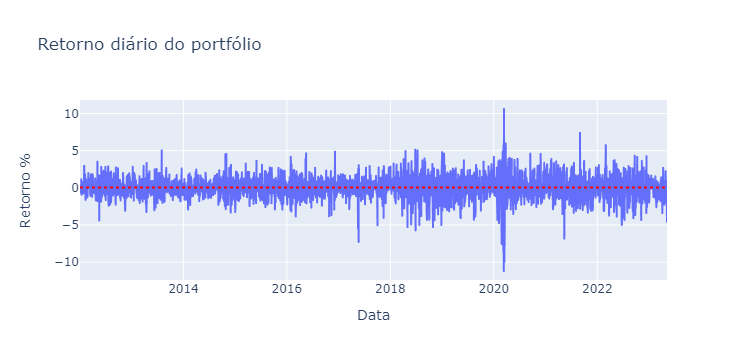

In [27]:
# Imprime histórico de retorno do portfólio
figura = px.line(x = datas, y = dataset['taxa retorno'], title = 'Retorno diário do portfólio',
                labels=dict(x="Data", y="Retorno %"))
figura.add_hline(y = dataset['taxa retorno'].mean(), line_color="red", line_dash="dot", )
figura.show()

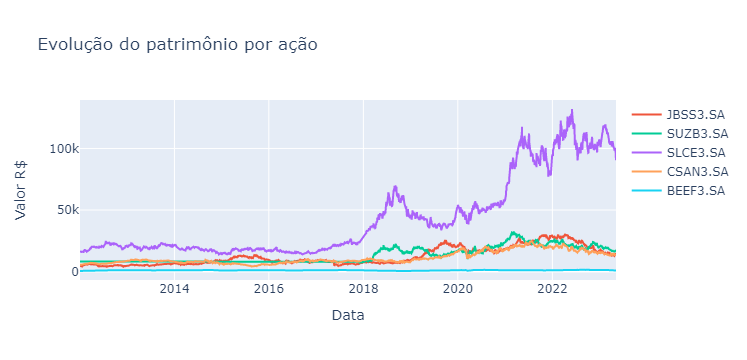

In [28]:
# Evolução do patrimônio por ação da carteira
fig = px.line(title = 'Evolução do patrimônio por ação')
for i in dataset.drop(columns = ['soma valor', 'taxa retorno']).columns:
  fig.add_scatter(x = datas, y = dataset[i], name = i)
fig.update_xaxes(title='Data')
fig.update_yaxes(title='Valor R$')
fig.show()

#### Análise da Evolução Patrimonial por Ação
O gráfico acima representa a evolução do patrimônio para cada uma das ações da carteira. Cada linha representa uma ação e a evolução do seu valor ao longo do tempo. A escala do eixo y está em reais (R$) e o eixo x representa as datas. A legenda mostra o nome de cada. Em destaque a ação SUZB3, com rendimento bem superior às demais.

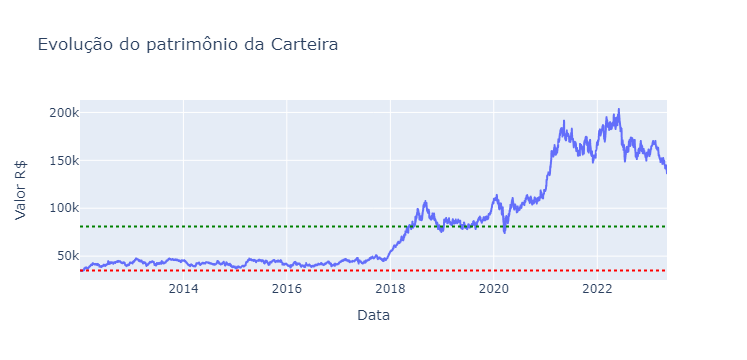

In [29]:
fig = px.line(x = datas, y = dataset['soma valor'], 
                 title = 'Evolução do patrimônio da Carteira',
                 labels=dict(x="Data", y="Valor R$"))
fig.add_hline(y = dataset['soma valor'].mean(), 
                 line_color="green", line_dash="dot", )
fig.add_hline(y = investimento_inicial, 
                 line_color="red", line_dash="dot", )
fig.show()

#### Análise da Evolução Patrimonial da Carteira
O gráfico plotado mostra a evolução do patrimônio da carteira ao longo do tempo, em relação ao investimento inicial. A linha azul representa a evolução do valor total da carteira, enquanto a linha pontilhada vermelha representa o valor do investimento inicial. Já a linha pontilhada verde representa a média dos valores da carteira ao longo do período.
Nota-se claramente o exito na escolha da carteira, com investimento inical de 35.000,00 reais com um retorno de mais de  **136.400,00 reais**, durante o período de simulação.

#### **Questão g)** 
Monte a avaliação de risco da carteira: Você deve usar a simulação Monte Carlo para calcular o *Value at Risk (VaR)* da carteira selecionada, que é uma medida de risco que quantifica a perda potencial em uma carteira em um nível de confiança específico. Você calcular o VaR para um nível de perda aceitável de retorno e também para um nível máximo de perda aceitável em valor em reais.

In [30]:
# salvando os dados do Max Sharpe Ratio
max_sr_ret_pcento = ret_arr[local_Max_Sharp_Ratio] * 100
max_sr_vol_pcento = vol_arr[local_Max_Sharp_Ratio] * 100
print(max_sr_ret_pcento)
print(max_sr_vol_pcento)

0.04525987277095264
1.467080973634087


#### Calculo do VaR
Para o cálculo do Valor em Risco (VaR) a função abaixo recebe a taxa de retorno da carteira durante o período da avaliação e o intervalo de confiança esparado, no caso 90%. 

In [31]:
def var(returns, confidence_level):
  returns = np.array(returns)
  z_score = norm.ppf(confidence_level)
  stdev = np.std(returns)
  var = -(returns.mean() + z_score * stdev)
  return var

# Calcula o VaR  com nível de confiança de 90%
confidence_level = 0.90
returns = dataset['taxa retorno']
var_90 = var(returns, confidence_level)
print(f'VaR no intervalo de confiância de 90%: {var_90:.2f}')

VaR no intervalo de confiância de 90%: -2.05


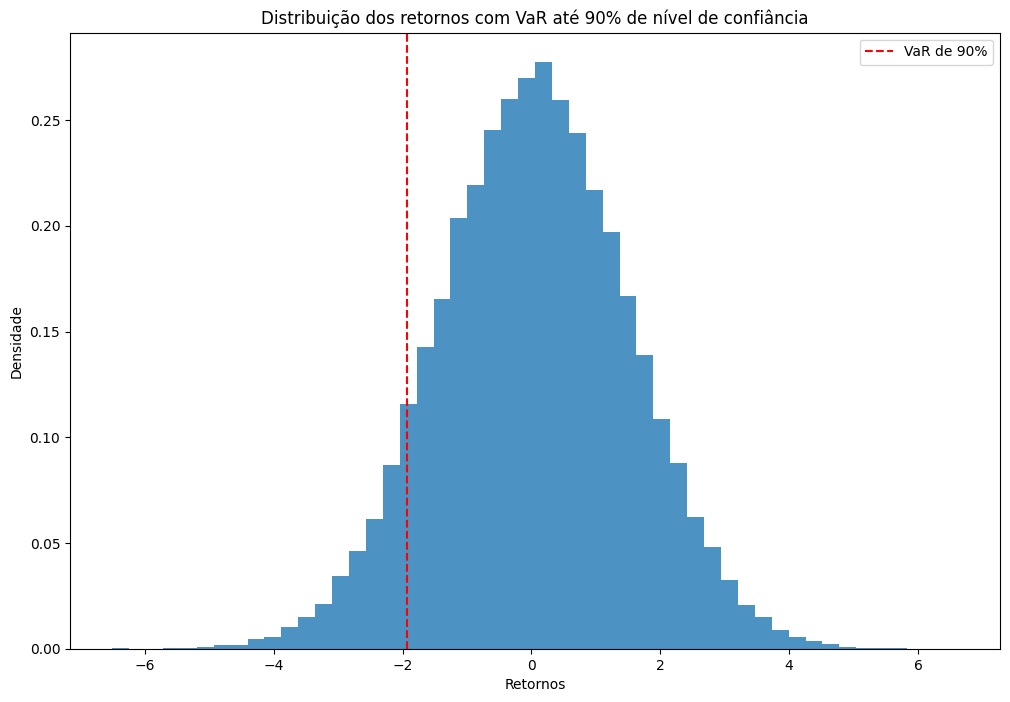

In [32]:
# Seta a semente
np.random.seed(42)

qtd_amostras=50000
# Gera um vetor de retornos com a quantidade de amostra escolhida
returns = np.random.normal(max_sr_ret_pcento, max_sr_vol_pcento, qtd_amostras)

# Calcula o VaR com o intervalo de confiança setado
confidence_level = 0.90
var_90 = var(returns, confidence_level)

# printa a distribuição de valores aleatória com o VaR
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(returns, bins=50, density=True, alpha=0.8)
ax.axvline(x=var_90, color='r', linestyle='--', label=f'VaR de {confidence_level*100:.0f}%')
ax.legend()
ax.set_xlabel('Retornos')
ax.set_ylabel('Densidade')
ax.set_title('Distribuição dos retornos com VaR até 90% de nível de confiância')
plt.show()

#### Análise da distibuição dos retornos com VaR de 90% 
O gráfico exibe a distribuição dos retornos gerados aleatoriamente com base no valor de retorno máximo e na volatilidade calculados a partir dos dados originais. A linha pontilhada em vermelho indica o valor em risco (VaR) com um intervalo de confiança de 90%. A linha é desenhada na vertical no eixo x, no ponto que representa o valor do VaR calculado anteriormente.

#### Calculo do VaR para o Investimento

In [33]:
def var(returns, confidence_level):
  returns = np.array(returns)
  z_score = norm.ppf(confidence_level)
  stdev = np.std(returns)
  var = -(returns.mean() + z_score * stdev)
  return var

# Calcula o VaR com o intervalo de confiança setado
confidence_level = 0.90
returns = dataset['soma valor']
var_90 = var(returns, confidence_level)
print(f'VaR no intervalo de confiância de 90%: {var_90:.2f}')

VaR no intervalo de confiância de 90%: -143582.80


In [34]:
media = dataset['soma valor'].mean()
print("Media de ganho", media)
desvp = dataset['soma valor'].std()
print('desvio padrão do ganho', desvp)

Media de ganho 80958.74173834374
desvio padrão do ganho 48874.49544636881


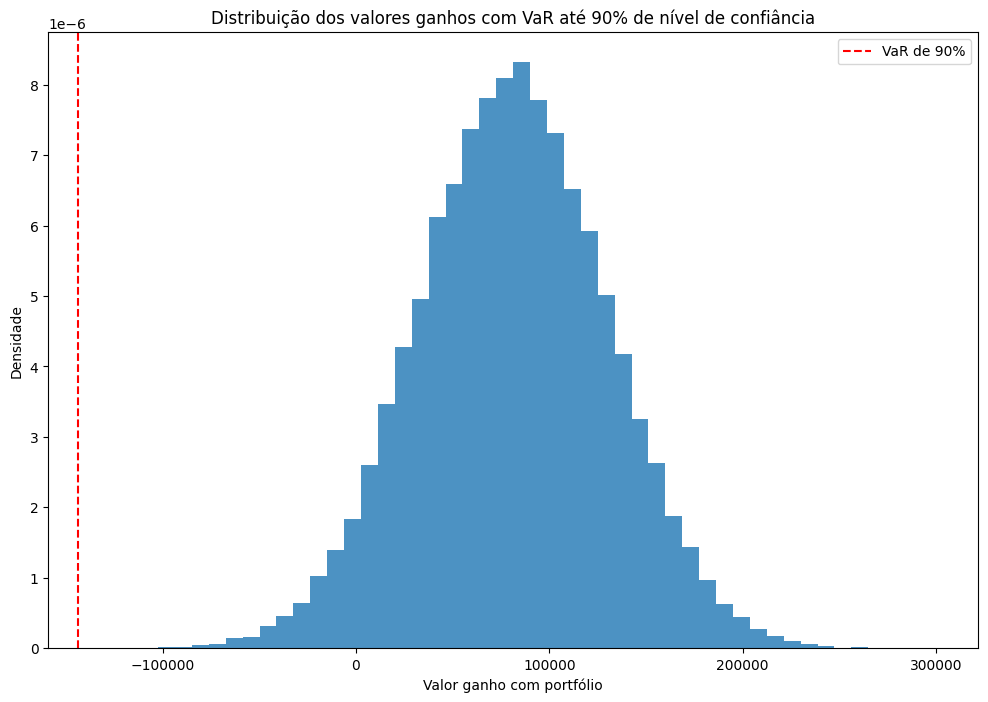

In [35]:
# Set the seed for reproducibility
np.random.seed(42)

# Generate a list of returns for 1000 periods
returns = np.random.normal(media, desvp, qtd_amostras)

# Calculate the VaR at the 90% confidence level
var_90 = var(returns, confidence_level)

# Plot the distribution of returns with the VaR level
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(returns, bins=50, density=True, alpha=0.8)
ax.axvline(x=var_90, color='r', linestyle='--', label=f'VaR de {confidence_level*100:.0f}%')
ax.legend()
ax.set_xlabel('Valor ganho com portfólio')
ax.set_ylabel('Densidade')
ax.set_title('Distribuição dos valores ganhos com VaR até 90% de nível de confiância')
plt.show()

#### Análise da distibuição dos ganhos com VaR de 90% 
O gráfico acima mostra a distribuição de ganhos esperados para um o portfólio selecionado, bem como o nível de VaR (Value at Risk) a 90% de nível de confiança, representado pela linha tracejada vermelha. O eixo x representa os valores de ganho, enquanto o eixo y representa a densidade de probabilidade. O histograma mostra a distribuição de probabilidade dos ganhos esperados e a linha vermelha tracejada marca o ponto de corte abaixo do qual há uma chance de 10% de os ganhos serem menores do que o valor do VaR. Em outras palavras, o VaR de 90% significa que há uma chance de 10% de perda em um determinado período ser igual ou superior ao valor do VaR.


Como o histograma representa a distribuição de retornos, é possível que a maior parte dos retornos esteja acima do VaR de 90%, o que justifica a ausência de intersecção entre a linha tracejada e o histograma.